In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_1 = pd.read_csv('data.csv')
dataset_1.head()

,area_type,availability,location,size(in BHK),total_sqft,per_Sqft,bath,furnishing,transaction,parking,price
0,Builder_Floor,Ready_to_move,Rohini Sector 25,3,800.0,NaN,2.0,Semi-Furnished,New_Property,1.0,6500000
1,Apartment,Ready_to_move,"J R Designers Floors, Rohini Sector 24",2,750.0,6667.0,2.0,Semi-Furnished,New_Property,1.0,5000000
2,Apartment,Ready_to_move,"Citizen Apartment, Rohini Sector 13",2,950.0,6667.0,2.0,Furnished,Resale,1.0,15500000
3,Builder_Floor,Ready_to_move,Rohini Sector 24,2,600.0,6667.0,2.0,Semi-Furnished,Resale,1.0,4200000
4,Builder_Floor,Ready_to_move,Rohini Sector 24,2,650.0,6667.0,2.0,Semi-Furnished,New_Property,1.0,6200000


In [5]:
dataset_1.shape

(1258, 11)

In [7]:
dataset_1.groupby('area_type')['area_type'].agg('count')

area_type
Apartment        593
Builder_Floor    660
Name: area_type, dtype: int64

In [9]:
dataset_2 = dataset_1.drop(['area_type','availability','per_Sqft','furnishing','transaction','parking'], axis='columns')
dataset_2.head()

,location,size(in BHK),total_sqft,bath,price
0,Rohini Sector 25,3,800.0,2.0,6500000
1,"J R Designers Floors, Rohini Sector 24",2,750.0,2.0,5000000
2,"Citizen Apartment, Rohini Sector 13",2,950.0,2.0,15500000
3,Rohini Sector 24,2,600.0,2.0,4200000
4,Rohini Sector 24,2,650.0,2.0,6200000


In [11]:
dataset_2.shape

(1258, 5)

In [13]:
dataset_2.isnull().sum()

location        0
size(in BHK)    0
total_sqft      0
bath            2
price           0
dtype: int64

In [15]:
dataset_3 = dataset_2.dropna()
dataset_3.isnull().sum()

location        0
size(in BHK)    0
total_sqft      0
bath            0
price           0
dtype: int64

In [17]:
dataset_3.shape

(1256, 5)

In [19]:
dataset_3['size(in BHK)'].unique()

array([ 3,  2,  4,  1,  6,  5,  7, 10], dtype=int64)

In [21]:
dataset_3.total_sqft.unique()

array([  800.    ,   750.    ,   950.    ,   600.    ,   650.    ,
        1300.    ,  1350.    ,   985.    ,  1100.    ,   870.    ,
         630.    ,   660.    ,   344.4448,   550.    ,  1150.    ,
         850.    ,   900.    ,   430.556 ,   914.9315,   500.    ,
          28.    ,  2160.    ,  1080.    ,  1450.    ,   810.    ,
        1710.    ,  1650.    ,  1280.    ,  1260.    ,  1130.    ,
        1500.    ,  1000.    ,  2925.    ,  1600.    ,  1143.    ,
        8000.    ,   890.    ,  1387.    ,  1050.    ,  1200.    ,
         700.    ,  1700.    ,  1550.    ,  1400.    ,  1900.    ,
        1850.    ,  1800.    ,  1620.    ,  1540.    ,  2300.    ,
        1560.    ,   400.    ,  1525.    ,  2200.    ,  2880.    ,
        2700.    ,  1575.    ,  1675.    ,   825.    ,   875.    ,
         450.    ,   100.    ,    75.    ,   270.    ,   444.    ,
         729.    ,  4050.    ,  2400.    ,   405.    ,   666.    ,
        1360.    ,  2170.    ,   720.    ,  1030.    ,   350. 

In [23]:
dataset_3.loc[:, 'price_per_sqft'] = dataset_3['price']/ dataset_3['total_sqft'].astype(float)
pd.set_option('display.float_format', '{:.2f}'.format)
dataset_3.head()

C:\Users\91838\AppData\Local\Temp\ipykernel_23900\1594493623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_3.loc[:, 'price_per_sqft'] = dataset_3['price']/ dataset_3['total_sqft'].astype(float)


,location,size(in BHK),total_sqft,bath,price,price_per_sqft
0,Rohini Sector 25,3,800.00,2.00,6500000,8125.00
1,"J R Designers Floors, Rohini Sector 24",2,750.00,2.00,5000000,6666.67
2,"Citizen Apartment, Rohini Sector 13",2,950.00,2.00,15500000,16315.79
3,Rohini Sector 24,2,600.00,2.00,4200000,7000.00
4,Rohini Sector 24,2,650.00,2.00,6200000,9538.46


In [25]:
len(dataset_3.location.unique())

353

In [27]:
dataset_3.head(1260)

,location,size(in BHK),total_sqft,bath,price,price_per_sqft
0,Rohini Sector 25,3,800.00,2.00,6500000,8125.00
1,"J R Designers Floors, Rohini Sector 24",2,750.00,2.00,5000000,6666.67
2,"Citizen Apartment, Rohini Sector 13",2,950.00,2.00,15500000,16315.79
3,Rohini Sector 24,2,600.00,2.00,4200000,7000.00
4,Rohini Sector 24,2,650.00,2.00,6200000,9538.46
...,...,...,...,...,...,...
1253,Chittaranjan Park,4,4118.00,5.00,55000000,13356.00
1254,Chittaranjan Park,3,1050.00,2.00,12500000,11904.76
1255,Chittaranjan Park,3,875.00,3.00,17500000,20000.00
1256,Chittaranjan Park Block A,2,990.00,2.00,11500000,11616.16


In [29]:
dataset_3.location=dataset_3.location.apply(lambda x: x.strip())

location_stats = dataset_3.groupby('location')['location'].agg('count').sort_values(ascending=False)
print(location_stats)

location
Lajpat Nagar 3                                          34
Lajpat Nagar 2                                          31
J R Designers Floors, Rohini Sector 24                  31
Kailash Colony, Greater Kailash                         30
Yamuna Vihar, Shahdara                                  29
                                                        ..
Defence Officers Apartment, Aashirwaad Chowk, Dwarka     1
Dda Janta Flats, Kalkaji                                 1
Patel Nagar South, Patel Nagar                           1
Dayanand Colony, Lajpat Nagar                            1
Zakir Nagar, New Friends Colony                          1
Name: location, Length: 330, dtype: int64


C:\Users\91838\AppData\Local\Temp\ipykernel_23900\1652721628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_3.location=dataset_3.location.apply(lambda x: x.strip())


In [31]:
len(location_stats[location_stats==1])

157

In [33]:
location_stats_less_than_5 = location_stats[location_stats<=5]
location_stats_less_than_5

location
Uttam Nagar West                                        5
Vikram Vihar, Lajpat Nagar                              5
Geeta Colony                                            5
Panchsheel Vihar, Sheikh Sarai                          5
Arjun Nagar, Safdarjung Enclave                         5
                                                       ..
Defence Officers Apartment, Aashirwaad Chowk, Dwarka    1
Dda Janta Flats, Kalkaji                                1
Patel Nagar South, Patel Nagar                          1
Dayanand Colony, Lajpat Nagar                           1
Zakir Nagar, New Friends Colony                         1
Name: location, Length: 273, dtype: int64

In [35]:
dataset_3.head(10)

,location,size(in BHK),total_sqft,bath,price,price_per_sqft
0,Rohini Sector 25,3,800.00,2.00,6500000,8125.00
1,"J R Designers Floors, Rohini Sector 24",2,750.00,2.00,5000000,6666.67
2,"Citizen Apartment, Rohini Sector 13",2,950.00,2.00,15500000,16315.79
3,Rohini Sector 24,2,600.00,2.00,4200000,7000.00
4,Rohini Sector 24,2,650.00,2.00,6200000,9538.46
5,Rohini Sector 24,4,1300.00,3.00,15500000,11923.08
6,Rohini Sector 24,4,1350.00,3.00,10000000,7407.41
7,"Delhi Homes, Rohini Sector 24",2,650.00,2.00,4000000,6153.85
8,Rohini Sector 21,3,985.00,3.00,6800000,6903.55
9,Rohini Sector 22,4,1300.00,4.00,15000000,11538.46


In [37]:
dataset_3.price_per_sqft.describe()

count     1256.00
mean     14584.75
std      20442.13
min        204.08
25%       6750.00
50%      11666.67
75%      17546.78
max     538461.54
Name: price_per_sqft, dtype: float64

In [39]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

dataset_4 = remove_pps_outliers(dataset_3)
dataset_4.shape

(714, 6)

In [41]:
dataset_4.rename(columns={'size(in BHK)': 'bhk'}, inplace=True)
dataset_4.head()

,location,bhk,total_sqft,bath,price,price_per_sqft
0,"Aashirwaad Chowk, Dwarka",3,1470.00,2.00,14500000,9863.95
1,"Aashirwaad Chowk, Dwarka",3,1500.00,2.00,14900000,9933.33
2,"Aashirwaad Chowk, Dwarka",3,1700.00,3.00,17200000,10117.65
3,"Abhimanyu Apartments, Vasundhara Enclave",3,1450.00,3.00,11600000,8000.00
4,"Abul Fazal Enclave Part 1, Okhla",2,540.00,1.00,3600000,6666.67


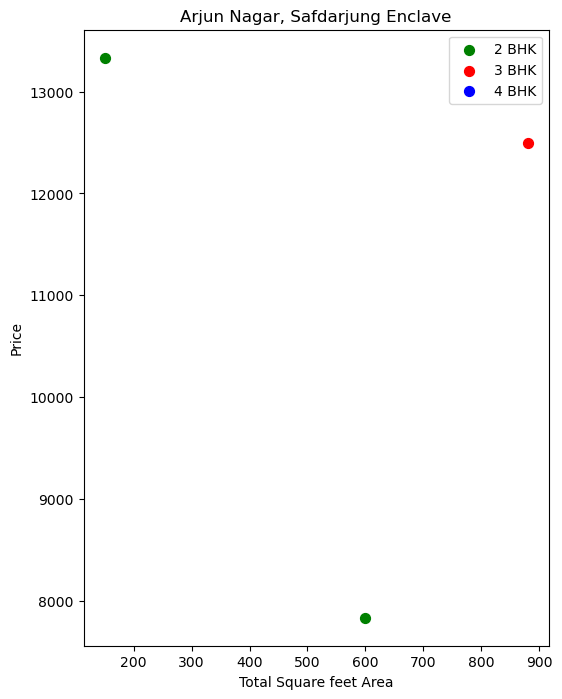

In [47]:
import matplotlib 
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location)&(df.bhk==2)]
    bhk3 = df[(df.location==location)&(df.bhk==3)]
    bhk4 = df[(df.location==location)&(df.bhk==4)]
    matplotlib.rcParams['figure.figsize'] = (6,8)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color="green",label="2 BHK",s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,color="red",label="3 BHK",s=50)
    plt.scatter(bhk4.total_sqft,bhk4.price_per_sqft,color="blue",label="4 BHK",s=50)
    plt.xlabel("Total Square feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(dataset_4,"Arjun Nagar, Safdarjung Enclave")

Text(0, 0.5, 'Count')

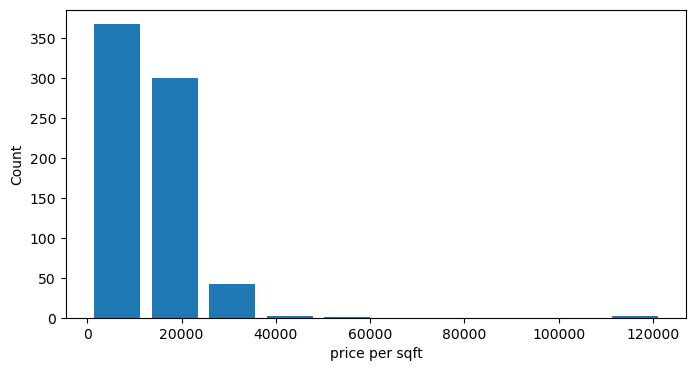

In [49]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(8,4)
plt.hist(dataset_4.price_per_sqft,rwidth=0.8)
plt.xlabel("price per sqft")
plt.ylabel("Count")
           


In [51]:
dataset_4.bath.unique()

array([2., 3., 1., 4., 5., 6., 7.])

Text(0, 0.5, 'count')

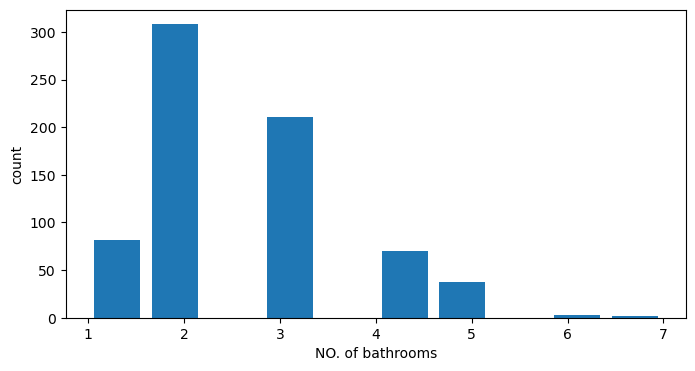

In [53]:
plt.hist(dataset_4.bath,rwidth=0.8)
plt.xlabel("NO. of bathrooms")
plt.ylabel("count")

In [55]:
# One-hot encoding of the 'location' column
dummies=pd.get_dummies(dataset_4['location']).astype(int)


In [57]:
# Combine the original DataFrame with the new one-hot encoded columns
dataset_5 = pd.concat([dataset_4, dummies], axis=1)
dataset_5.head(5)

,location,bhk,total_sqft,bath,price,price_per_sqft,"Aashirwaad Chowk, Dwarka","Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla",...,"The Amaryllis, Karol Bagh","The Leela Sky Villas, Patel Nagar",Uttam Nagar,Uttam Nagar West,Vasant Kunj,Vasant Kunj Sector C,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Yamuna Vihar, Shahdara"
0,"Aashirwaad Chowk, Dwarka",3,1470.00,2.00,14500000,9863.95,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Aashirwaad Chowk, Dwarka",3,1500.00,2.00,14900000,9933.33,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Aashirwaad Chowk, Dwarka",3,1700.00,3.00,17200000,10117.65,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Abhimanyu Apartments, Vasundhara Enclave",3,1450.00,3.00,11600000,8000.00,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Abul Fazal Enclave Part 1, Okhla",2,540.00,1.00,3600000,6666.67,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# Optionally drop the original 'location' column if you no longer need it
dataset_5 = dataset_5.drop('location', axis=1)
dataset_5.head(2)

,bhk,total_sqft,bath,price,price_per_sqft,"Aashirwaad Chowk, Dwarka","Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla",Alaknanda,...,"The Amaryllis, Karol Bagh","The Leela Sky Villas, Patel Nagar",Uttam Nagar,Uttam Nagar West,Vasant Kunj,Vasant Kunj Sector C,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Yamuna Vihar, Shahdara"
0,3,1470.00,2.00,14500000,9863.95,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1500.00,2.00,14900000,9933.33,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
dataset_5.shape

(714, 148)

In [63]:
## model building

In [65]:
X = dataset_5.drop(['price','price_per_sqft'],axis='columns')
X.head(2)

,bhk,total_sqft,bath,"Aashirwaad Chowk, Dwarka","Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla",Alaknanda,"Amar Colony, Lajpat Nagar","Andheria Mor, Mehrauli",...,"The Amaryllis, Karol Bagh","The Leela Sky Villas, Patel Nagar",Uttam Nagar,Uttam Nagar West,Vasant Kunj,Vasant Kunj Sector C,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Yamuna Vihar, Shahdara"
0,3,1470.00,2.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1500.00,2.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
y = dataset_5.price
y.head(2)

0    14500000
1    14900000
Name: price, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [70]:
from sklearn.ensemble import RandomForestRegressor

rf_classifier = RandomForestRegressor()
rf_classifier.fit(X_train, y_train)
rf_score = rf_classifier.score(X_test, y_test)
print(f'Random Forest R^2 Score: {rf_score}')

Random Forest R^2 Score: 0.6857643246053169


In [71]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(RandomForestRegressor(),X,y,cv=cv)

array([0.82636567, 0.83017625, 0.79018283, 0.79772946, 0.75112904])

In [72]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    # Define models and their hyperparameters for tuning
    algos = {
        'lasso': {
            'model': Lasso(), 
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {  
            'model': RandomForestRegressor(), 
            'params': {
                'n_estimators': [10, 50, 100],
                'max_features': ['auto', 'sqrt', 'log2']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        grid_search = GridSearchCV(
            config['model'], 
            config['params'], 
            cv=cv, 
            return_train_score=False,
            
        )
        grid_search.fit(X, y)  # Fit the model
        
        # Append the best score and parameters to scores
        scores.append({
            'model': algo_name,
            'best_score': grid_search.best_score_,
            'best_params': grid_search.best_params_,
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)



C:\Users\91838\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.152e+15, tolerance: 2.872e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\91838\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.600e+16, tolerance: 2.784e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\91838\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.135e+16, toleranc

,model,best_score,best_params
0,lasso,0.61,"{'alpha': 1, 'selection': 'random'}"
1,decision_tree,0.76,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
2,random_forest,0.85,"{'max_features': 'log2', 'n_estimators': 50}"


In [73]:
X.columns

Index(['bhk', 'total_sqft', 'bath', 'Aashirwaad Chowk, Dwarka',
       'Abhimanyu Apartments, Vasundhara Enclave',
       'Abul Fazal Enclave Part 1, Okhla', 'Abul Fazal Enclave Part-II, Okhla',
       'Alaknanda', 'Amar Colony, Lajpat Nagar', 'Andheria Mor, Mehrauli',
       ...
       'The Amaryllis, Karol Bagh', 'The Leela Sky Villas, Patel Nagar',
       'Uttam Nagar', 'Uttam Nagar West', 'Vasant Kunj',
       'Vasant Kunj Sector C', 'Vasundhara Enclave',
       'Vikram Vihar, Lajpat Nagar', 'Vinoba Puri, Lajpat Nagar',
       'Yamuna Vihar, Shahdara'],
      dtype='object', length=146)

In [74]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=bhk
    x[1]=sqft
    x[2]=bath
    if loc_index >=0:
        x[loc_index]=1

    return rf_classifier.predict([x])[0]
    

In [110]:
predict_price('Abul Fazal Enclave Part 1, Okhla',2,660,4)

C:\Users\91838\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


6234000.0

In [98]:
predict_price('Abul Fazal Enclave Part 1, Okhla',6,1470,6)

C:\Users\91838\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


7017000.0

In [100]:
import pickle
with open('delhi_home_prices_model.pickle','wb') as f:
    pickle.dump(rf_classifier,f)

In [102]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))